In [1]:
import numpy as np # library to handle data in a vectorized manner
import seaborn as sns

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [6]:
df = pd.read_csv("new.csv")
df.head(11)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,CITY,claimed,country,cuisines,descriptions.dateSeen,descriptions.sourceURLs,descriptions.value,facebookPageURL,features.key,features.value,hours.day,hours.dept,hours.hour,imageURLs,isClosed,keys,languagesSpoken,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.currency,menus.dateSeen,menus.description,menus.name,menus.sourceURLs,name,paymentTypes,phones,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,sic,sourceURLs,twitter,websites,yearOpened
0,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,"Squash, carrots, butternut squash and potato",Baked Kabocha,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
1,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,With wild blend brown rice,Short Grain Brown Rice,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
2,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,NaN,Green Bean Veggie Soup,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
3,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,8.95,8.95,NaN,USD,2016-04-22T02:48:00.000Z,NaN,"Steamed Broccoli, Carrots and Turnips",https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
4,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,With vinegar tahini beet dressing,Mixed Green Sal

In [7]:
%matplotlib inline


In [8]:
for col in df.columns: 
    print(col)

id
dateAdded
dateUpdated
address
categories
primaryCategories
city
CITY
claimed
country
cuisines
descriptions.dateSeen
descriptions.sourceURLs
descriptions.value
facebookPageURL
features.key
features.value
hours.day
hours.dept
hours.hour
imageURLs
isClosed
keys
languagesSpoken
latitude
longitude
menuPageURL
menus.amountMax
menus.amountMin
menus.category
menus.currency
menus.dateSeen
menus.description
menus.name
menus.sourceURLs
name
paymentTypes
phones
postalCode
priceRangeCurrency
priceRangeMin
priceRangeMax
province
sic
sourceURLs
twitter
websites
yearOpened


In [9]:
idf=df[['cuisines','address','CITY','latitude','longitude','menus.name','name','postalCode']]

In [10]:
idf.head()

,cuisines,address,CITY,latitude,longitude,menus.name,name,postalCode
0,"Thai,Asian/Pacific,Vegetarian",1045 San Pablo Ave,Albany,37.885131,-122.297013,Baked Kabocha,Potala Organic Cafe,94706
1,"Thai,Asian/Pacific,Vegetarian",1045 San Pablo Ave,Albany,37.885131,-122.297013,Short Grain Brown Rice,Potala Organic Cafe,94706
2,"Thai,Asian/Pacific,Vegetarian",1045 San Pablo Ave,Albany,37.885131,-122.297013,Green Bean Veggie Soup,Potala Organic Cafe,94706
3,"Thai,Asian/Pacific,Vegetarian",1045 San Pablo Ave,Albany,37.885131,-122.297013,"Steamed Broccoli, Carrots and Turnips",Potala Organic Cafe,94706
4,"Thai,Asian/Pacific,Vegetarian",1045 San Pablo Ave,Albany,37.885131,-122.297013,Mixed Green Salad,Potala Organic Cafe,94706


In [11]:
idk=df[['cuisines','CITY','menus.name','name']]

In [12]:
iifa=df[['CITY','name']]
iifa = iifa.drop_duplicates()
cities=iifa[(iifa.CITY == 'New York City')|(iifa.CITY=='Brooklyn')|(iifa.CITY=='Long Island City')|(iifa.CITY=='Jamaica')|(iifa.CITY=='Long Island City')|(iifa.CITY=='Astoria')|(iifa.CITY=='Jackson Heights')|(iifa.CITY=='College Point')|(iifa.CITY=='Astoria')|(iifa.CITY=='Woodside')|(iifa.CITY=='South Richmond Hill')|(iifa.CITY=='Kew Gardens')|(iifa.CITY=='Flushing')|(iifa.CITY=='Jamaica')]

cities.head()

,CITY,name
37,New York City,Green Force Juice
76,New York City,Liquiteria
477,Brooklyn,Frappe 'n Wrap
558,Brooklyn,Clementine Bakery
570,New York City,Mudspot


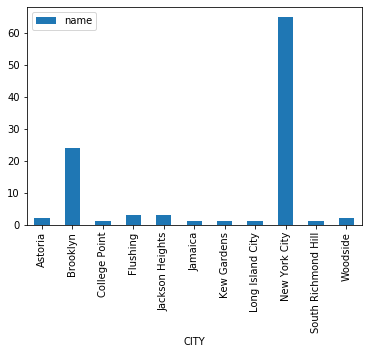

In [13]:
cities.groupby('CITY').count().plot.bar()

In [14]:
im=idf[['CITY','cuisines']]
ima = im.drop_duplicates()
ima.head(20)


,CITY,cuisines
0,Albany,"Thai,Asian/Pacific,Vegetarian"
5,San Diego,"Vegetarian,Indian"
37,New York City,"Smoothies and Juices,Vegetarian,Healthy"
76,New York City,"Local/Organic,Vegan Restaurants,Smoothies and ..."
386,Houston,"Seafood,Italian,Vegetarian,Deli and Sandwich"
477,Brooklyn,"Sushi,Kosher,Vegan"
558,Brooklyn,"Desserts,Bakery and Pastries,Vegan"
570,New York City,"American (New),Vegetarian,Coffee and Tea,Healt..."
773,New York City,"Vegetarian,Coffee and Tea,Bakery,Desserts,Bake..."
783,Brooklyn,"Local/Organic,Vegetarian,Coffee and Tea,Health..."


In [15]:
city_cuisines=ima[(ima.CITY == 'New York City')|(ima.CITY=='Brooklyn')|(ima.CITY=='Long Island City')|(ima.CITY=='Jamaica')|(ima.CITY=='Long Island City')|(ima.CITY=='Astoria')|(ima.CITY=='Jackson Heights')|(ima.CITY=='College Point')|(ima.CITY=='Astoria')|(ima.CITY=='Woodside')|(ima.CITY=='South Richmond Hill')|(ima.CITY=='Kew Gardens')|(ima.CITY=='Flushing')|(ima.CITY=='Jamaica')]
city_cuisines.set_index(['CITY'])


,cuisines
CITY,
New York City,"Smoothies and Juices,Vegetarian,Healthy"
New York City,"Local/Organic,Vegan Restaurants,Smoothies and ..."
Brooklyn,"Sushi,Kosher,Vegan"
Brooklyn,"Desserts,Bakery and Pastries,Vegan"
New York City,"American (New),Vegetarian,Coffee and Tea,Healt..."
New York City,"Vegetarian,Coffee and Tea,Bakery,Desserts,Bake..."
Brooklyn,"Local/Organic,Vegetarian,Coffee and Tea,Health..."
Brooklyn,"Vegetarian,Indian"
New York City,"Vegetarian,Indian"


In [16]:
dfn = city_cuisines['cuisines'].groupby(df['CITY']).max()
dfn

CITY
Astoria                         Middle Eastern,Vegetarian,Sandwiches
Brooklyn                                       Vegetarian,Vietnamese
College Point                              Japanese,Sushi,Vegetarian
Flushing                      Indian,Vegetarian,Take Out Restaurants
Jackson Heights                           Vegetarian,Indian,Desserts
Jamaica                                            Indian,Vegetarian
Kew Gardens                                        Indian,Vegetarian
Long Island City       Local/Organic,Vegetarian,Coffee and Tea,Vegan
New York City                                        Vegetarian,Thai
South Richmond Hill                                Indian,Vegetarian
Woodside                                             Thai,Vegetarian
Name: cuisines, dtype: object

In [17]:
NYC=im[(im.CITY=='New York City')]
NYC.set_index(['CITY'])
NYC=NYC.drop_duplicates()
NYC.head()


,CITY,cuisines
37,New York City,"Smoothies and Juices,Vegetarian,Healthy"
76,New York City,"Local/Organic,Vegan Restaurants,Smoothies and ..."
570,New York City,"American (New),Vegetarian,Coffee and Tea,Healt..."
773,New York City,"Vegetarian,Coffee and Tea,Bakery,Desserts,Bake..."
879,New York City,"Vegetarian,Indian"


In [18]:
NYC.count()


CITY        39
cuisines    39
dtype: int64

In [19]:
idn=df[['address','CITY','latitude','longitude','postalCode']]
idn=idn.drop_duplicates()
idn=idn[(idn.CITY == 'New York City')|(idn.CITY=='Brooklyn')|(idn.CITY=='Long Island City')|(idn.CITY=='Jamaica')|(idn.CITY=='Long Island City')|(idn.CITY=='Astoria')|(idn.CITY=='Jackson Heights')|(idn.CITY=='College Point')|(idn.CITY=='Astoria')|(idn.CITY=='Woodside')|(idn.CITY=='South Richmond Hill')|(idn.CITY=='Kew Gardens')|(idn.CITY=='Flushing')|(idn.CITY=='Jamaica')]
idn.set_index(['CITY'])
idn.head()




,address,CITY,latitude,longitude,postalCode
37,2265 Broadway,New York City,40.785469,-73.979105,10024
76,102 8th Ave,New York City,40.740560,-74.001710,10011
477,1702 Avenue M,Brooklyn,40.618010,-73.957970,11230
558,395 Classon Ave,Brooklyn,40.687556,-73.959589,11238
570,307 E 9th St,New York City,40.729012,-73.986771,10003


In [20]:
idm=idn[(idn.CITY=='New York City')]
idm=idm[['CITY','address','latitude','longitude','postalCode']]
idm.set_index(['CITY'])
idm.head()


,CITY,address,latitude,longitude,postalCode
37,New York City,2265 Broadway,40.785469,-73.979105,10024
76,New York City,102 8th Ave,40.740560,-74.001710,10011
570,New York City,307 E 9th St,40.729012,-73.986771,10003
773,New York City,338 E 11th St,40.729436,-73.984727,10003
879,New York City,115 Lexington Ave,40.742497,-73.982421,10016


In [21]:
import os

In [22]:
address = "New York"

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York city are 40.7127281, -74.0060152.


In [23]:
map_NYC = folium.Map(location=[latitude, longitude], zoom_start=10)
map_NYC

In [24]:
for lat, lng, borough, neighborhood in zip(
        idn['latitude'], 
        idn['longitude'], 
        idn['CITY'], 
        idn['address']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NYC)  

map_NYC

In [25]:
for lat, lng, borough, neighborhood in zip(
        idm['latitude'], 
        idm['longitude'], 
        idm['CITY'], 
        idm['address']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NYC)  

map_NYC

### we see not many veg places in uptown manhattan but overall there are more veg restaurants in manhattan compared to other borough in nyc

This means that its best to make a restaurant where there is less competion, basically somewhere in uptown.
It will also be part of manhattan which contains the most veg restaurants because people from different cultures come here and many tourists also. Who dont eat meat or is veg will love it because manhattan is one of the most busiest place in nyc and having restaurants in a communty with less of them will make it better to attract customers. 

In [26]:
os.getcwd()

'C:\\Users\\maitr\\Downloads'

## The following are results i got from pivot table done in Excel to know which cusines are best to include in this new restaurant:

<img src="Screenshot (167).png">

<img src="Screenshot (166).png">

## We see top 3 veg cuisines in NYC are  Indian ,Chinese and Mexican.However the biggest cuisine is Indian.